In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
df_raw = pd.read_csv("Downloads/query3.csv", index_col=None, header=0)

In [3]:
df = pd.DataFrame()
df['food'] = df_raw['food']
df['food_name'] = df_raw['foodLabel']
df['ingredient_id'] = df_raw['mother']
df['ingredient_name'] = df_raw['label_clean']
df['origin_id'] = df_raw['father']
df['origin_name'] = df_raw['fatherLabel']
df['ingredient_category'] = df_raw['category']
df

,food,food_name,ingredient_id,ingredient_name,origin_id,origin_name,ingredient_category
0,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q11002,sugar,NaN,NaN,spice
1,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q841779,coconut milk,NaN,NaN,fruits
2,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q1269205,rice flour,NaN,NaN,flour
3,http://www.wikidata.org/entity/Q100255672,moho,http://www.wikidata.org/entity/Q2249305,wheat flour,NaN,NaN,flour
4,http://www.wikidata.org/entity/Q100529246,punten,http://www.wikidata.org/entity/Q11254,salt,NaN,NaN,spice
...,...,...,...,...,...,...,...
2336,http://www.wikidata.org/entity/Q59602,emping,NaN,NaN,http://www.wikidata.org/entity/Q10377,Majalengka,NaN
2337,http://www.wikidata.org/entity/Q59602,emping,NaN,NaN,http://www.wikidata.org/entity/Q10395,Cirebon,NaN
2338,http://www.wikidata.org/entity/Q59602,emping,NaN,NaN,http://www.wikidata.org/entity/Q10981,Wonogiri,NaN
2339,http://www.wikidata.org/entity/Q59602,emping,NaN,NaN,http://www.wikidata.org/entity/Q11013,Wonosobo,NaN


In [4]:
import sqlite3 as sl

In [5]:
con = sl.connect('test_db.db')

In [13]:
with con:
    con.execute("""
        CREATE TABLE IF NOT EXISTS FOOD_INGREDIENT (
            food TEXT NOT NULL,
            food_name TEXT,
            ingredient_id TEXT,
            ingredient_name TEXT,
            origin_id TEXT,
            origin_name TEXT,
            ingredient_category TEXT
        );
    """)

In [14]:
data = df.values.tolist()

In [15]:
sql = 'INSERT INTO FOOD_INGREDIENT (food, food_name, ingredient_id, ingredient_name, origin_id, origin_name, ingredient_category) values(?, ?, ?, ?, ?, ?, ?)'

In [16]:
with con:
    con.executemany(sql, data)

In [17]:
with con:
    data = con.execute("SELECT * FROM FOOD_INGREDIENT WHERE food_name = 'cenil'")
    for row in data:
        print(row)

('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q11002', 'sugar', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'spice')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q11254', 'salt', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'spice')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q177998', 'agar', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'carb')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q753009', 'food coloring', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'misc')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q841779', 'coconut milk', 'http://www.wikidata.org/entity/Q3557', 'Central Java', 'fruits')
('http://www.wikidata.org/entity/Q11114189', 'cenil', 'http://www.wikidata.org/entity/Q3342808', 'coconut', 'http://www.wikidata.org/entity/

In [18]:
df = pd.read_sql_query("SELECT food_name, group_concat(replace(ingredient_name,' ','_'), ' ') as ingredient_list from (select distinct food_name, ingredient_name from FOOD_INGREDIENT) group by 1", con)
df = df.dropna()
df

,food_name,ingredient_list
1,Adon-Adon Coro,ginger spice coconut_milk palm_sugar
2,Angsle,glutinous_rice coconut_milk
6,Ayam panggang Bangka,chicken
7,Babi Panggang Karo,pork_meat
8,Babungku,salt coconut_milk rice_flour banana_leaf brown...
...,...,...
408,tiwul,cassava
409,tumpeng,rice egg tempeh
411,urap,white_cabbage spinach asparagus bean_sprout co...
414,wingko,margarine sugar salt coconut glutinous_rice_flour


In [19]:
# df.to_csv("Downloads/query_food.csv")
total_ingredient = pd.read_sql_query("SELECT ingredient_name, ingredient_category, count(distinct food_name) from FOOD_INGREDIENT where ingredient_name is not null group by 1,2 order by 3 desc", con)
total_ingredient

,ingredient_name,ingredient_category,count(distinct food_name)
0,coconut milk,fruits,63
1,salt,spice,59
2,sugar,spice,44
3,garlic,spice,35
4,palm sugar,seasoning,34
...,...,...,...
187,turnip,spice,1
188,vegetable,vegetables,1
189,walnut,nuts,1
190,white cabbage,vegetables,1


# Create Ingredient Connection

In [20]:
# Create a sublist of lower case words for each tweet
ingredient_in_list = [ingredient.split() for ingredient in df.ingredient_list]

In [21]:
import nltk
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in ingredient_in_list]

# View bigrams for the first tweet
terms_bigram[0]

[('ginger', 'spice'),
 ('spice', 'coconut_milk'),
 ('coconut_milk', 'palm_sugar')]

In [22]:
import itertools
import collections

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('sugar', 'salt'), 22),
 (('coconut_milk', 'rice_flour'), 13),
 (('glutinous_rice', 'coconut_milk'), 7),
 (('rice_flour', 'wheat_flour'), 7),
 (('pandan', 'coconut_milk'), 7),
 (('coconut_milk', 'palm_sugar'), 6),
 (('salt', 'coconut_milk'), 6),
 (('sugar', 'coconut_milk'), 6),
 (('palm_sugar', 'coconut'), 6),
 (('palm_sugar', 'cassava'), 6),
 (('salt', 'chili'), 5),
 (('salt', 'garlic'), 5),
 (('rice_flour', 'coconut'), 5),
 (('water', 'salt'), 5),
 (('sugar', 'glutinous_rice'), 4),
 (('coconut_milk', 'glutinous_rice_flour'), 4),
 (('coconut', 'glutinous_rice_flour'), 4),
 (('onion', 'garlic'), 4),
 (('flour', 'egg'), 4),
 (('egg', 'coconut_milk'), 4)]

In [23]:
from collections import defaultdict

def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing
        text = text.lower().split()
        # iterate over ingredient list
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1
    
    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df


In [24]:
df_test = co_occurrence(df.ingredient_list, 2)
df_test

,agar,amaranth,ambarella,anchovy,arrow_loach,asam,asparagus,baking_powder,bamboo,bamboo_shoots,...,vanilla,vegetable,vegetable_oil,vinegar,walnut,water,wheat_flour,white_cabbage,yeast,yolk
agar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amaranth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ambarella,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anchovy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arrow_loach,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wheat_flour,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4,1
white_cabbage,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,1


In [25]:
df_temp = df_test.head(20)

In [26]:
columns = list(df_temp)
columns

['agar',
 'amaranth',
 'ambarella',
 'anchovy',
 'arrow_loach',
 'asam',
 'asparagus',
 'baking_powder',
 'bamboo',
 'bamboo_shoots',
 'banana',
 'banana_leaf',
 'basil',
 'bay_leaf',
 'bean_sprout',
 'beef',
 'beet',
 'bell_fruit',
 'bilimbi',
 'black-eyed_pea',
 'blackpepper',
 'bottlegourd',
 'bread',
 'breadnut',
 'broth',
 'brown_sugar',
 'butter',
 'cabbage',
 'candlenut',
 'cardamom',
 'carrot',
 'cassava',
 'cassava_flour',
 'cattle',
 'cauliflower',
 'celery',
 'cendol',
 'chicken',
 'chicken_fingers',
 'chicken_stock',
 'chili',
 'chives',
 'chocolate_powder',
 'cinnamon',
 'clam',
 'coconut',
 'coconut_cream',
 'coconut_milk',
 'coconut_oil',
 'coffee_bean',
 'condiment',
 'cooking_oil',
 'coriander',
 'corn',
 "cow's_trotters",
 'cowhide',
 'cracker',
 'cucumber',
 'dried_shrimp',
 'drinking_water',
 'duck_meat',
 'egg',
 'egg_white',
 'eggplant',
 'emping',
 'fish',
 'flavour_enhancer',
 'flour',
 'food_coloring',
 'fried_onion',
 'galangal',
 'garlic',
 'ghost_pepper',
 '

In [27]:
df_compiled = pd.DataFrame(columns=['bigram','count'])

for i,row in df_test.iterrows():
    for j in columns:
        if row[j] > 0:
            bigram_name = (i,j)
            reverse_bigram_name = (j,i)
            bigram_value = row[j]
            df_t = pd.DataFrame(columns=['bigram','count'])
            df_t.loc[-1] = [bigram_name, bigram_value]
            if df_compiled[df_compiled['bigram']==reverse_bigram_name].empty == False:
                print('dup')
            else:
                df_compiled = df_compiled.append(df_t, ignore_index = True)

dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup


In [28]:
df_compiled

,bigram,count
0,"(agar, coconut_milk)",1
1,"(agar, food_coloring)",1
2,"(agar, salt)",1
3,"(agar, sugar)",1
4,"(amaranth, basil)",1
...,...,...
830,"(tilia_leaf, turmeric)",2
831,"(vegetable_oil, wheat_flour)",1
832,"(wheat_flour, yeast)",4
833,"(wheat_flour, yolk)",1


In [29]:
df_compiled = df_compiled.sort_values(by=['count'], ascending=False)
df_compiled

,bigram,count
778,"(salt, sugar)",22
361,"(coconut_milk, salt)",15
358,"(coconut_milk, rice_flour)",15
366,"(coconut_milk, sugar)",13
335,"(coconut_milk, glutinous_rice)",11
...,...,...
296,"(chives, tapioca)",1
297,"(chives, tofu)",1
298,"(chocolate_powder, glutinous_rice_flour)",1
299,"(chocolate_powder, wheat_flour)",1


# Create Graph

In [62]:
import networkx as nx

In [84]:
# Create dictionary of edges and their weights
d = df_compiled.head(100).set_index('bigram').T.to_dict('records')

In [64]:
d

[{('salt', 'sugar'): 22,
  ('coconut_milk', 'salt'): 15,
  ('coconut_milk', 'rice_flour'): 15,
  ('coconut_milk', 'sugar'): 13,
  ('coconut_milk', 'glutinous_rice'): 11,
  ('garlic', 'salt'): 8,
  ('coconut_milk', 'palm_sugar'): 8,
  ('rice_flour', 'wheat_flour'): 8,
  ('coconut_milk', 'egg'): 8,
  ('garlic', 'onion'): 8,
  ('coconut_milk', 'wheat_flour'): 7,
  ('salt', 'water'): 7,
  ('glutinous_rice', 'sugar'): 7,
  ('coconut_milk', 'glutinous_rice_flour'): 7,
  ('egg', 'salt'): 7,
  ('coconut_milk', 'pandan'): 7,
  ('rice_flour', 'sugar'): 6,
  ('cassava', 'palm_sugar'): 6,
  ('brown_sugar', 'rice_flour'): 6,
  ('coconut', 'coconut_milk'): 6,
  ('coconut', 'palm_sugar'): 6,
  ('chili', 'salt'): 6,
  ('glutinous_rice', 'palm_sugar'): 5,
  ('egg', 'flour'): 5,
  ('brown_sugar', 'coconut_milk'): 5,
  ('coconut', 'rice_flour'): 5,
  ('garlic', 'ginger'): 5,
  ('glutinous_rice_flour', 'salt'): 5,
  ('rice_flour', 'salt'): 5,
  ('ginger', 'lemongrass'): 5,
  ('beef', 'galangal'): 5,
  ('e

In [33]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

In [88]:
G

## All Ingredients Graph

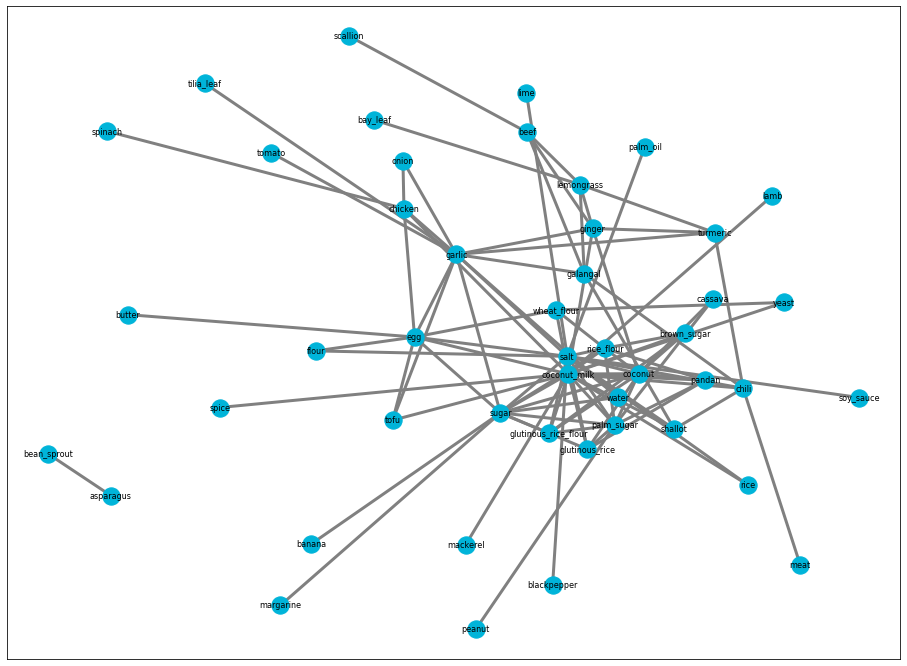

In [34]:
fig, ax = plt.subplots(figsize=(16, 12))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=8,
                 width=3,
                 edge_color='grey',
                 node_color='#00b4d9',
                 with_labels = True,
                 ax=ax)

plt.show()

In [35]:
weights = nx.get_edge_attributes(G,'weight').values()
weights

dict_values([220, 150, 80, 70, 70, 60, 50, 50, 40, 40, 30, 30, 30, 30, 30, 30, 20, 20, 130, 70, 60, 40, 40, 40, 30, 30, 30, 20, 20, 150, 110, 80, 80, 70, 70, 70, 60, 50, 30, 30, 30, 30, 30, 30, 20, 20, 20, 20, 80, 60, 50, 30, 30, 50, 30, 30, 80, 50, 40, 40, 30, 30, 20, 20, 20, 20, 60, 60, 40, 30, 20, 40, 40, 50, 30, 30, 20, 30, 40, 20, 20, 30, 30, 20, 30, 30, 30, 30, 50, 30, 30, 30, 30, 30, 20, 50, 30, 40, 30, 20])

## Modify Graph 

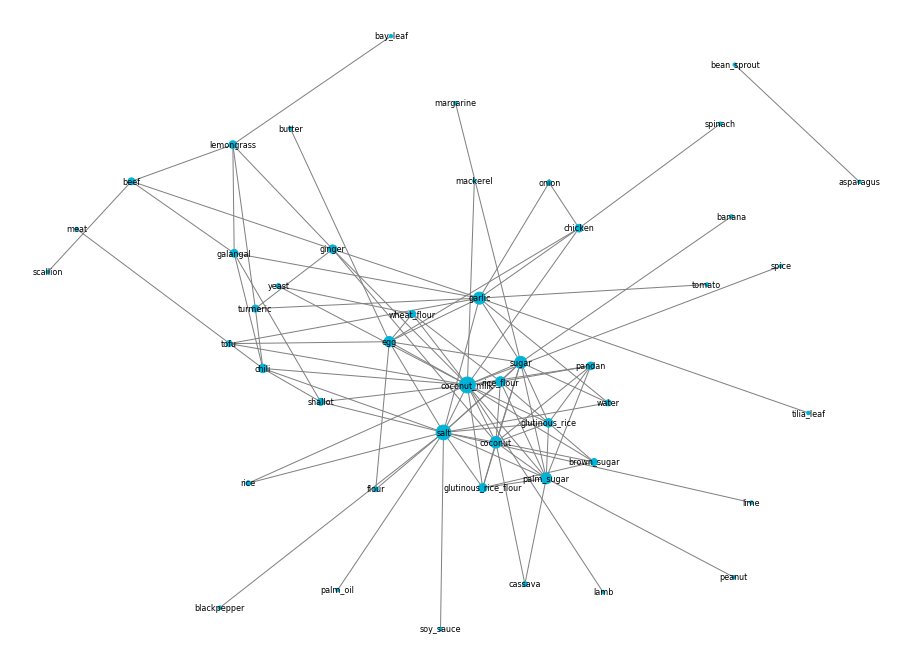

In [53]:
# Use node degree as the node size

fig, ax = plt.subplots(figsize=(16, 12))

pos = nx.spring_layout(G, k=2)

d = dict(G.degree)

nx.draw(G, pos,
        font_size=8,
        width=1,
        edge_color='grey',
        node_color='#00b4d9',
        with_labels = True, 
        nodelist=d.keys(), 
        node_size=[v * 12 for v in d.values()])
plt.show()

In [85]:
carac = pd.DataFrame()
carac = total_ingredient[['ingredient_name','ingredient_category']]
carac

,ingredient_name,ingredient_category
0,coconut milk,fruits
1,salt,spice
2,sugar,spice
3,garlic,spice
4,palm sugar,seasoning
...,...,...
187,turnip,spice
188,vegetable,vegetables
189,walnut,nuts
190,white cabbage,vegetables


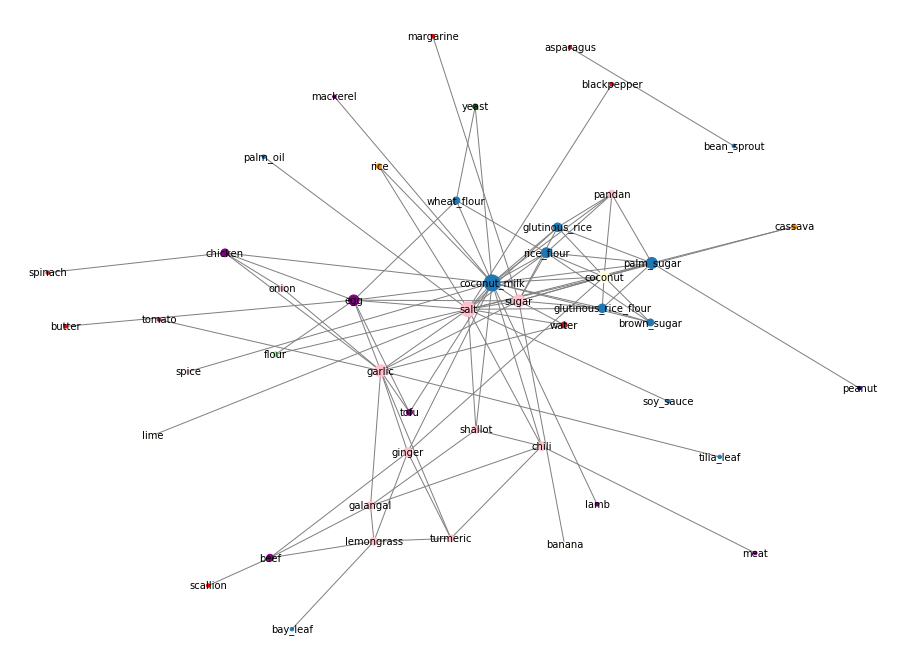

In [86]:
import matplotlib

# Create network plot 
G_mod = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G_mod.add_edge(k[0], k[1], weight=(v * 10))

# Get the dataframe of ingredient name and it's category    
carac = pd.DataFrame()
carac = total_ingredient[['ingredient_name','ingredient_category']]

# Reindex the dataframe to align with graph's nodes
carac = carac.set_index('ingredient_name')
carac = carac.reindex(G_mod.nodes())

carac['ingredient_category'] = pd.Categorical(carac['ingredient_category'])
carac['ingredient_category'].cat.codes

# Specify colors, number of colors listed should align with the number of categories
cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange', 'lightgreen', 'lightyellow', 'darkgreen', 'darkblue', 'purple', 'red', 'pink', 'brown'])

# Get node degree in a dict for node size parameter
d = dict(G.degree)

# Draw graph
fig, ax = plt.subplots(figsize=(16, 12))

pos = nx.spring_layout(G, k=2)

nx.draw(G, pos,
        font_size=10,
        width=1,
        edge_color='grey',
        node_color=carac['ingredient_category'].cat.codes, 
        cmap=cmap,
        with_labels = True, 
        nodelist=d.keys(), 
        node_size=[v * 12 for v in d.values()])
plt.show()

In [37]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the item(s) that have highest co-occurrence: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

print(prolific_collaborators)

['coconut_milk']


## Subset Cliques

In [38]:
list(nx.find_cliques(G))

[['garlic', 'water', 'salt', 'sugar'],
 ['garlic', 'galangal'],
 ['garlic', 'egg', 'tofu'],
 ['garlic', 'egg', 'salt', 'sugar'],
 ['garlic', 'egg', 'chicken'],
 ['garlic', 'onion', 'chicken'],
 ['garlic', 'ginger', 'turmeric'],
 ['garlic', 'tomato'],
 ['garlic', 'tilia_leaf'],
 ['scallion', 'beef'],
 ['palm_oil', 'salt'],
 ['asparagus', 'bean_sprout'],
 ['cassava', 'coconut', 'palm_sugar'],
 ['peanut', 'palm_sugar'],
 ['lemongrass', 'ginger', 'beef'],
 ['lemongrass', 'ginger', 'turmeric'],
 ['lemongrass', 'galangal', 'beef'],
 ['lemongrass', 'bay_leaf'],
 ['margarine', 'sugar'],
 ['flour', 'salt', 'egg'],
 ['banana', 'sugar'],
 ['soy_sauce', 'salt'],
 ['meat', 'chili'],
 ['coconut_milk', 'tofu', 'egg'],
 ['coconut_milk', 'salt', 'shallot', 'chili'],
 ['coconut_milk',
  'salt',
  'sugar',
  'palm_sugar',
  'coconut',
  'glutinous_rice_flour'],
 ['coconut_milk', 'salt', 'sugar', 'palm_sugar', 'coconut', 'glutinous_rice'],
 ['coconut_milk', 'salt', 'sugar', 'palm_sugar', 'coconut', 'rice_

In [39]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

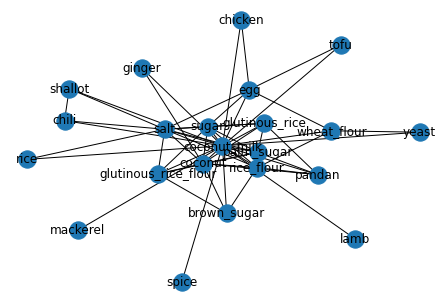

In [40]:
# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(G, ['coconut_milk'])

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

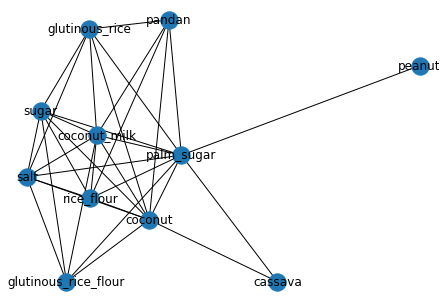

In [41]:
# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(G, ['palm_sugar'])

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

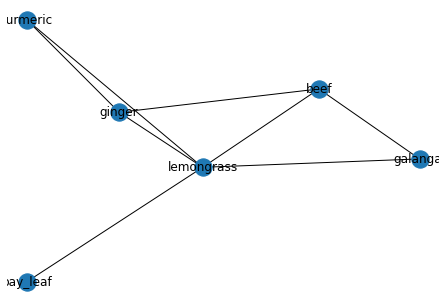

In [42]:
# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(G, ['lemongrass'])

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()